<a href="https://colab.research.google.com/github/renukagore107/Online-Retail-Customer-Segmentaion/blob/main/Online_Retail_Customer_Sagmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name -
#Online Retail Customer Sagmentation
         

#Project Summary -


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

**Attribute Information:**
InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.


#GitHub Link -



#Problem Statement

Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.

#Let's Begin !

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# Visualizing missing values
import missingno as msno

from datetime import datetime
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from prettytable import PrettyTable 

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read Dataset
customer_df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [4]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
customer_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
customer_df.shape

(541909, 8)

In [7]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
# Columns and data types
print("Columns and data types")
pd.DataFrame(customer_df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [10]:
# Check the uunique values
customer_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [11]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


checking duplicate values

In [12]:
customer_df.duplicated().unique()

array([False,  True])

In [13]:
len(customer_df[customer_df.duplicated()])

5268

In [14]:
#duplicate records
customer_df[customer_df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Duplicate values are present.lets drop it

In [15]:
# Dropping Duplicate Rows
customer_df=customer_df.drop_duplicates()


In [16]:
len(customer_df[customer_df.duplicated()])

0

In [17]:
customer_df.shape

(536641, 8)

checking for null values

In [18]:
customer_df.isnull().sum().sort_values(ascending=False)

CustomerID     135037
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [19]:
# Calculating the Missing Values % contribution in DF
customer_df_null = round(customer_df.isnull().sum()/len(customer_df)*100,2).sort_values(ascending=False)
customer_df_null

CustomerID     25.16
Description     0.27
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64

<AxesSubplot:>

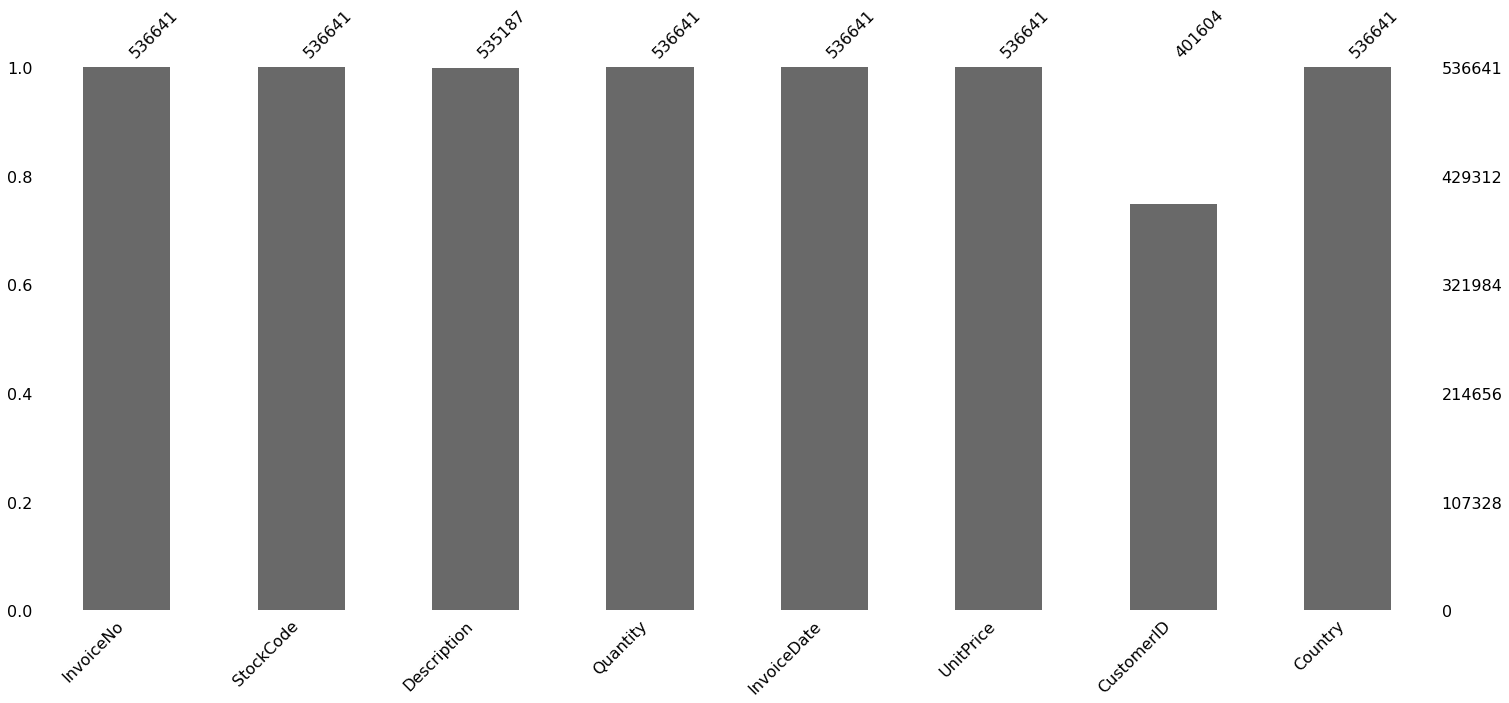

In [20]:
msno.bar(customer_df)

As we can see two columns in data have missing values.

Description - 0.27% (1454 nos.)
CustomerID - 24.93% (135037)

There are 541909 rows and 8 columns in above dataset.

Above dataset has missing value on Description & CustomerID.

There are 5268 duplicate values.

CustomerID is important feature of our analysis since our analysis is centered around Customers only so we can not impute null values CustomerID with mean/ median/ mode in this case. 
We will check possibility to fill null values in CustomerID column by looking up for InvoiceNo of the row having null CustomerID in other rows where CustomerID is present. 
If there are still any null values in CustomerID after this process then we will drop complete row having missing CustomerID.

In [21]:
# Lets Drop the null value
customer_df.dropna(inplace = True)

In [22]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


after droping null and duplicate value .shape of dataset is



In [23]:
customer_df.shape

(401604, 8)

We also need to drop some InvoiceNo which starts with 'c' as it indicates cancellation.



In [24]:
# Lets check the InviceNo that starts with c
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')
customer_df[customer_df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [25]:
customer_df = customer_df[~customer_df['InvoiceNo'].str.contains('C')]
customer_df.shape

(392732, 8)

# Perform descriptive anaylysis on the given data:

In [27]:
# CustomerID is 'float64', changing the datatype of CustomerId to string as Customer ID as numerical data does not make sense

customer_df['CustomerID'] = customer_df['CustomerID'].astype(str)

In [28]:
customer_df.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice
count,392732.000000,392732,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 12:02:00,1.950000
75%,12.000000,2011-10-20 12:53:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,181.588420,NaN,22.240725


Quantity: Average quantity of each product in transaction is 12.18. 

Also note that minimum value in Quantity column is negative. This implies that some customers had returned the product during our period of analysis.

InvoiceDate: Our data has transaction between 01-12-2010 to 09-12-2011
UnitPrice: Average price of each product in transactions is 3.47

In [30]:
customer_df.describe(include=['O'])

,InvoiceNo,StockCode,Description,CustomerID,Country
count,392732,392732,392732,392732,392732
unique,18536,3665,3877,4339,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom
freq,542,2023,2016,7676,349227


InvoiceNo: Total entries in preprocessed data are 4,01,602 but transactions are 22,190. Most number of entries (count of unique products) are in Invoice No. '576339' and is 542 nos.

StockCode: There are total 3684 unique products in our data and product with stock code '85123A' appears most frequently (2065 times) in our data.

CustomerID: There are 4372 unique customers in our final preprocessed data. Customer with ID '17841' appears most frequently in data (7812 times)

Country: Company has customers across 37 countries. Most entries are from United Kingdom in our dataset (356726)

In [31]:
# Lets check the unique id of the customer
customer_df['CustomerID'].nunique()

4339

In [32]:
# Most active customers
active_customers = pd.DataFrame(customer_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
active_customers.rename(columns = {'index':'CustomerID', 'CustomerID':'Count'},inplace = True)
active_customers.head()

,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


Text(0, 0.5, 'Count')

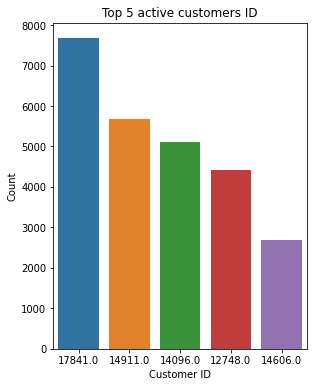

In [33]:
# Now lets plot the top 5 customers
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

Analysis of categorical features

In [34]:
# Analyze categorical features
categorical_columns = list(customer_df.select_dtypes(['object']).columns)
categorical_features = pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country'], dtype='object')

In [35]:
# Create a variable and count the stockcode
stockcode_df = customer_df['StockCode'].value_counts().reset_index()
stockcode_df.head()

,index,StockCode
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


In [36]:
stockcode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
stockcode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
stockcode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


<AxesSubplot:title={'center':'Top Five Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

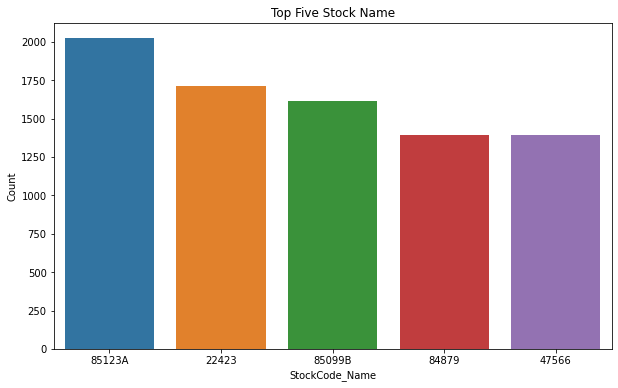

In [37]:

# Plot top 5 stock name
plt.figure(figsize=(10,6))
plt.title('Top Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[:5])

<AxesSubplot:title={'center':'Bottom Five Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

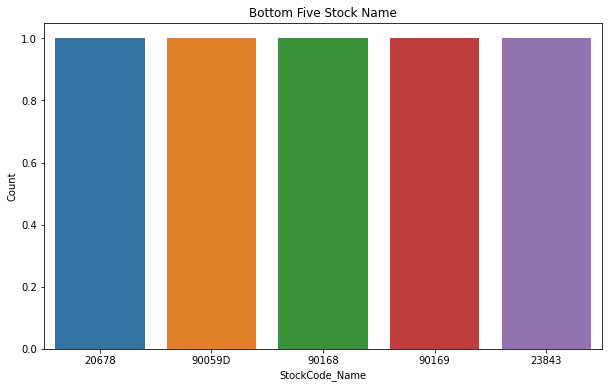

In [38]:
# Plot bottom 5 stock name
plt.figure(figsize=(10,6))
plt.title('Bottom Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[-5:])

Description

In [39]:
# Create a variable and check the description variable
Description_df = customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns = {'index':'Description_Name'},inplace = True)
Description_df.rename(columns = {'Description':'Count'}, inplace = True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


<AxesSubplot:title={'center':'Top Five Product'}, xlabel='Description_Name', ylabel='Count'>

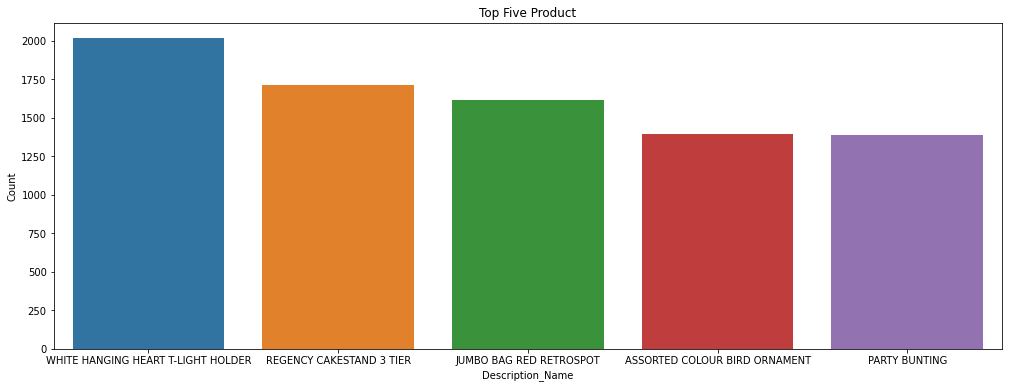

In [40]:
# Plot the top 5 product
plt.figure(figsize=(17,6))
plt.title('Top Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.head(5))

<AxesSubplot:title={'center':'Bottom Five Product'}, xlabel='Description_Name', ylabel='Count'>

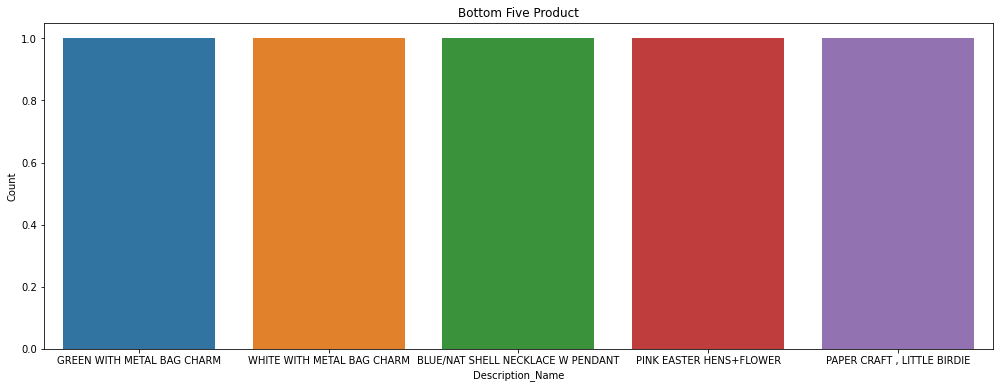

In [41]:
# Plot the bottom 5 product
plt.figure(figsize=(17,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.tail(5))

In [42]:
# Create a variable and check the country variable and check top 5 countries
country_df = customer_df['Country'].value_counts().reset_index()
country_df.rename(columns = {'index':'Country_Name'}, inplace = True)
country_df.rename(columns = {'Country':'Count'}, inplace = True)
country_df.head()

,Country_Name,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


<AxesSubplot:title={'center':'Top Five Countries'}, xlabel='Country_Name', ylabel='Count'>

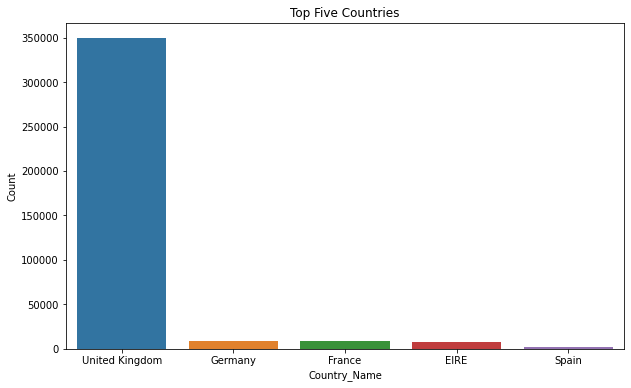

In [43]:
# Plot the top 5 countries
plt.figure(figsize=(10,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count', data = country_df.head(5))

Checking the distribution of numerical column to understand the data distribution is whether positively skwewd, negative skewed or symetric.

In [44]:
# Convert InvoiceDate column into 'year','month','day','hour','minute' and second
customer_df['InvoiceDate_year'] = customer_df['InvoiceDate'].dt.year
customer_df['InvoiceDate_month'] = customer_df['InvoiceDate'].dt.month
customer_df['InvoiceDate_day'] = customer_df['InvoiceDate'].dt.day
customer_df['InvoiceDate_hour'] = customer_df['InvoiceDate'].dt.hour
customer_df['InvoiceDate_minute'] = customer_df['InvoiceDate'].dt.minute
customer_df['InvoiceDate_second'] = customer_df['InvoiceDate'].dt.second
print('columns and data types')
pd.DataFrame(customer_df.dtypes).rename(columns = {0:'dtype'})

columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object
InvoiceDate_year,int64
InvoiceDate_month,int64


In [45]:
()# Lets again check shape of the dataset
customer_df.shape

(392732, 14)

We are creating some new features from Invoicedate like hours,year,month_num,day_num

In [46]:
# Create a new features TotalAmount from product of Quantity and Unitprice
customer_df['TotalAmount']=customer_df['Quantity']*customer_df['UnitPrice']
 # Creating new feature Month which gives the month like january, february, etc.
customer_df['Month']=customer_df['InvoiceDate'].dt.month_name() 
customer_df[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,TotalAmount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,20.34,December
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010,12,1,8,26,0,15.30,December
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,12,1,8,26,0,25.50,December
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,8,28,0,11.10,December
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,8,28,0,11.10,December
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010,12,1,8,34,0,54.08,December


In [47]:
# distribution of TotalAmount 
plt.figure(figsize=(15,8))


<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:title={'center':'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

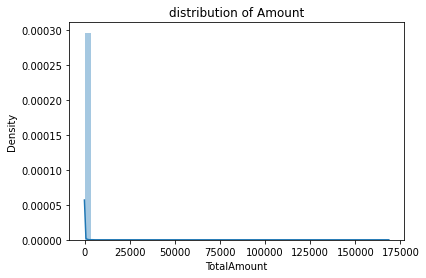

In [48]:
plt.title('distribution of Amount')
sns.distplot(customer_df['TotalAmount'])


<AxesSubplot:title={'center':'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

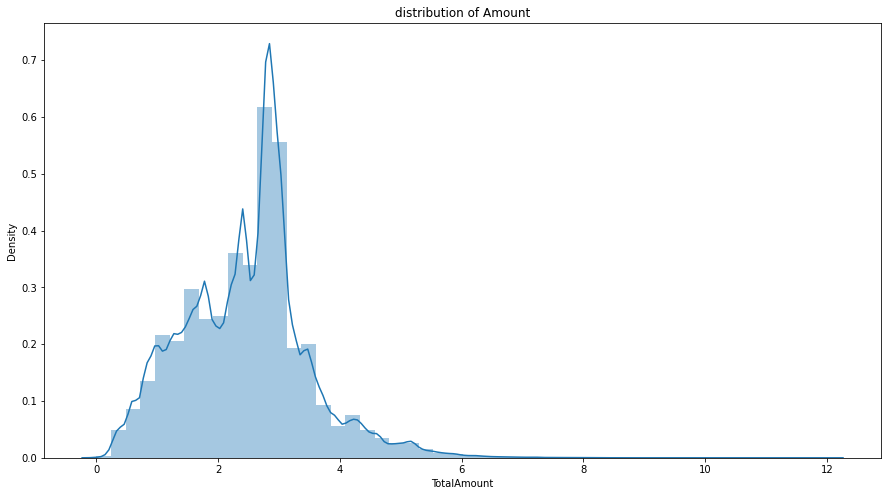

In [49]:
# log transform on distribution of TotalAmount 
plt.figure(figsize=(15,8))
plt.title('distribution of Amount')
sns.distplot(np.log1p(customer_df['TotalAmount']))

<AxesSubplot:title={'center':'distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

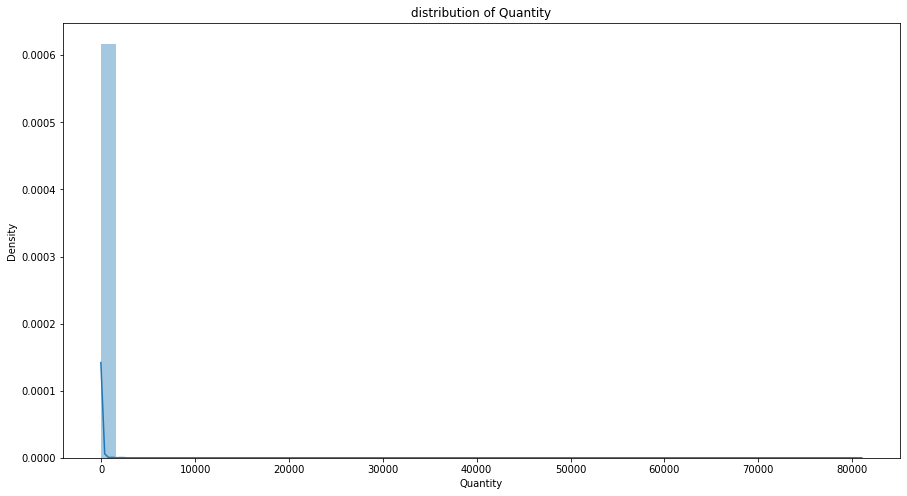

In [50]:
#distribution of Quantity
plt.figure(figsize=(15,8))
plt.title('distribution of Quantity')
sns.distplot(customer_df['Quantity'])

<AxesSubplot:title={'center':'log distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

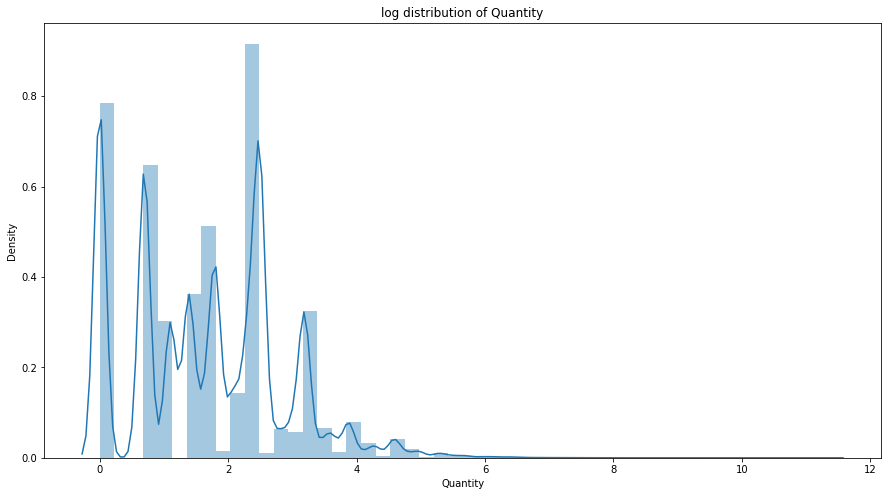

In [51]:
#Log transformation on distribution of Quantity 
plt.figure(figsize=(15,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(customer_df['Quantity']))

In [52]:
# Assigning numerical columns to variables
numerical_columns = list(customer_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'TotalAmount'],
      dtype='object')

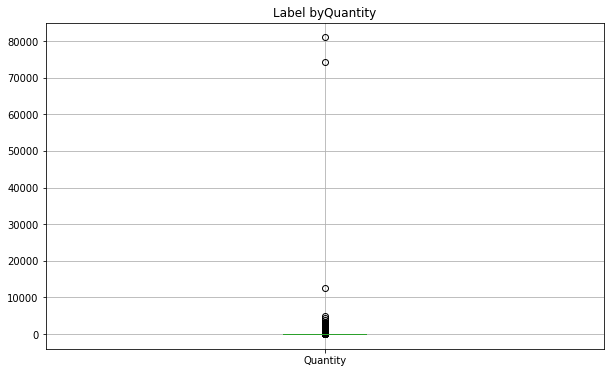

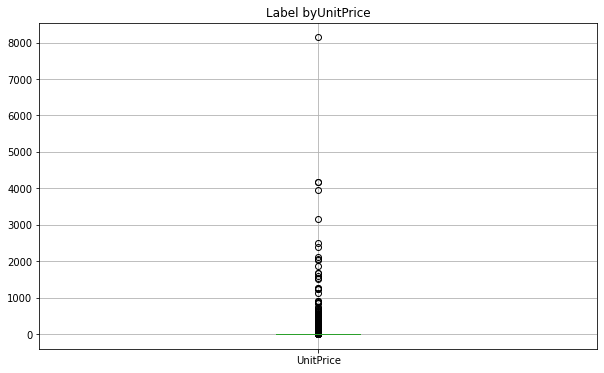

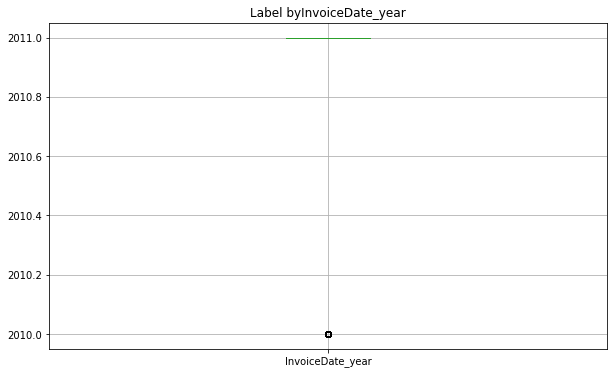

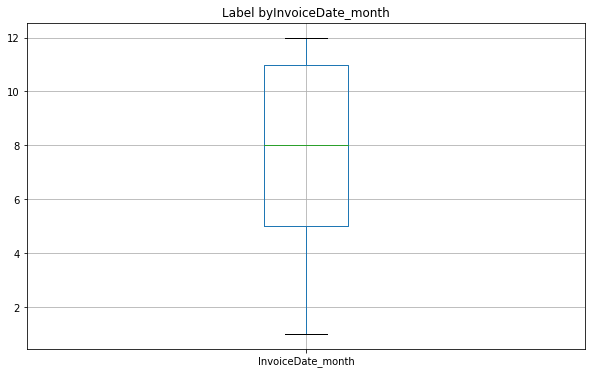

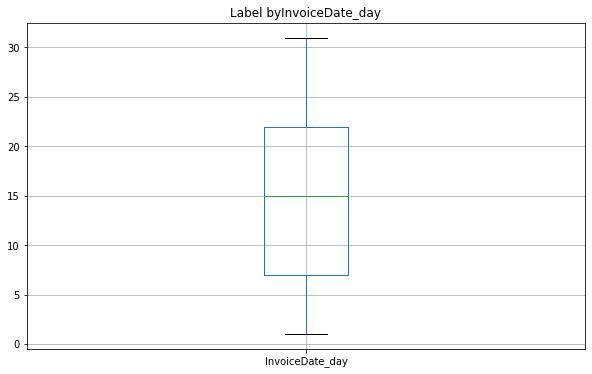

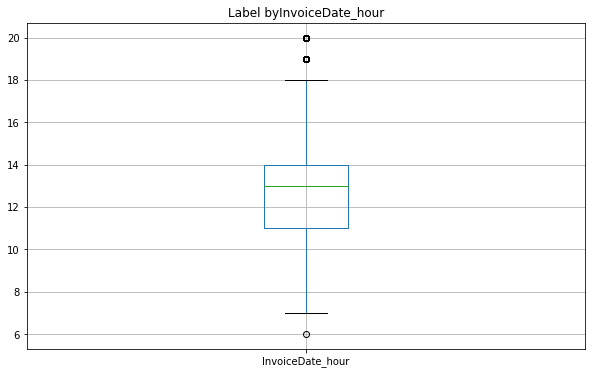

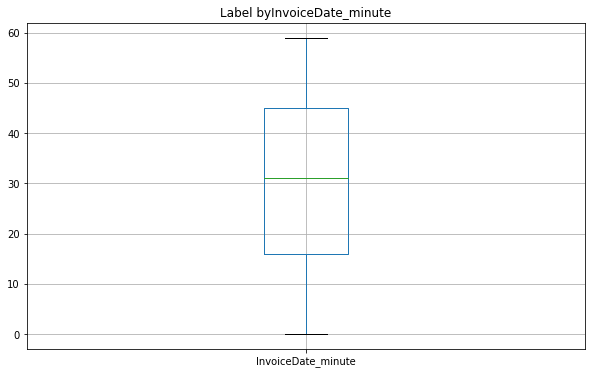

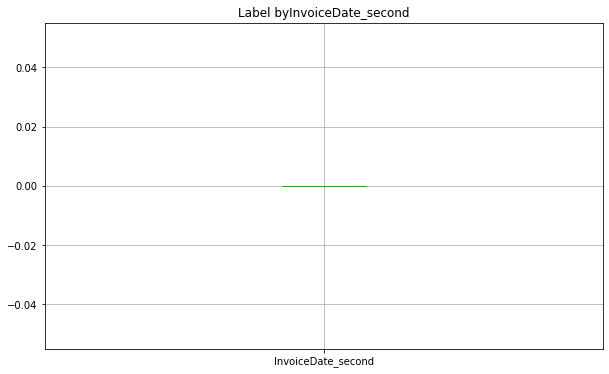

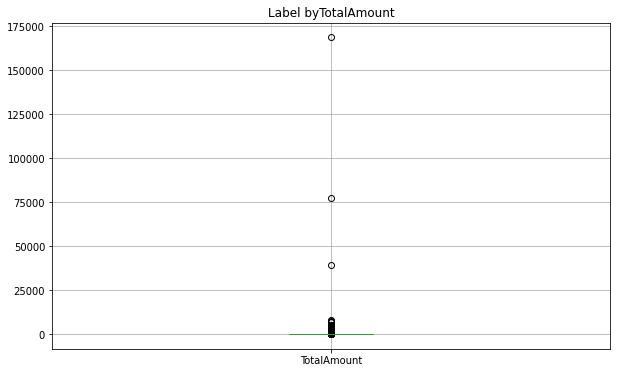

In [53]:
# Plot the box plot for each numerical feature
for col in numerical_features:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  customer_df.boxplot(col)
  ax.set_title("Label by" + col)
  plt.show()

In [54]:
# Creating a function to remove outliers
def remove_outliers(customer_df , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = customer_df[column].quantile(0.75)
  q1 = customer_df[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    customer_df = customer_df[customer_df[column] <= upper_limit]
  else:
    customer_df = customer_df[(customer_df[column] >= lower_limit) & (customer_df[column] <= upper_limit)]   
  
  return customer_df

In [55]:
# Removing the outliers using the function created
customer_df = remove_outliers(customer_df = customer_df, column = 'Quantity')
customer_df= remove_outliers(customer_df = customer_df, column = 'UnitPrice')

Correlation Matrix

<AxesSubplot:>

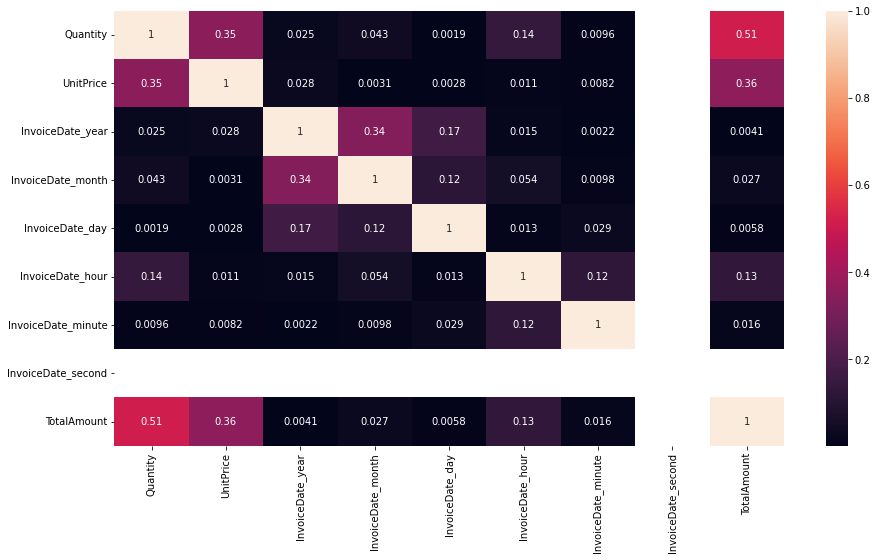

In [56]:
# Plot heatmap to show correlation of different variables
plt.figure(figsize=(15,8))
correlation = customer_df.corr()
sns.heatmap(abs(correlation), annot = True)

#Feature Engineering

In [57]:
# Create a new feature day from Invoicedate
customer_df['Day'] = customer_df['InvoiceDate'].dt.day_name()

In [58]:
# Create a variable and count the day name
day_df = customer_df['Day'].value_counts().reset_index()
day_df.rename(columns = {'index':'Day_Name'}, inplace= True)
day_df.rename(columns = {'Day':'Count'},inplace = True)
day_df

,Day_Name,Count
0,Thursday,66124
1,Wednesday,56838
2,Tuesday,55374
3,Monday,54609
4,Sunday,54452
5,Friday,45868


<AxesSubplot:title={'center':'Day'}, xlabel='Day_Name', ylabel='Count'>

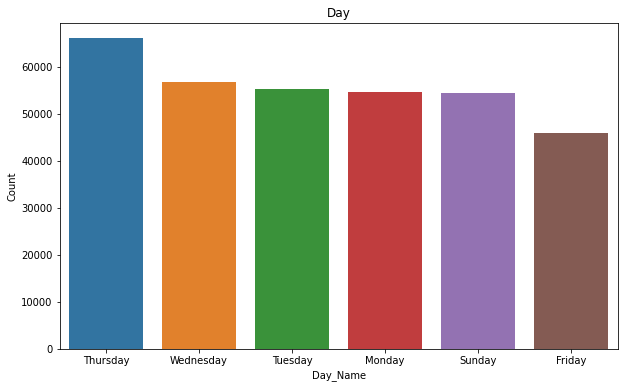

In [59]:
# Plot the number of shopping as per days
plt.figure(figsize=(10,6))
plt.title('Day')
sns.barplot(x= 'Day_Name', y='Count',data=day_df)

From above plot we can conclude that most number of shopping is done on Thrusday, Wednesday and Tuesday.

In [60]:
# Number of customers shoppping per month
month_df = customer_df['InvoiceDate_month'].value_counts().reset_index()
month_df.rename(columns = {'index':'Month_Name'},inplace = True)
month_df.rename(columns = {'InvoiceDate_month':'Count'},inplace = True)
month_df

,Month_Name,Count
0,11,55217
1,10,42151
2,12,36468
3,9,33973
4,5,23151
5,8,22482
6,3,22448
7,7,22397
8,6,22317
9,4,18824


<AxesSubplot:title={'center':'Month'}, xlabel='Month_Name', ylabel='Count'>

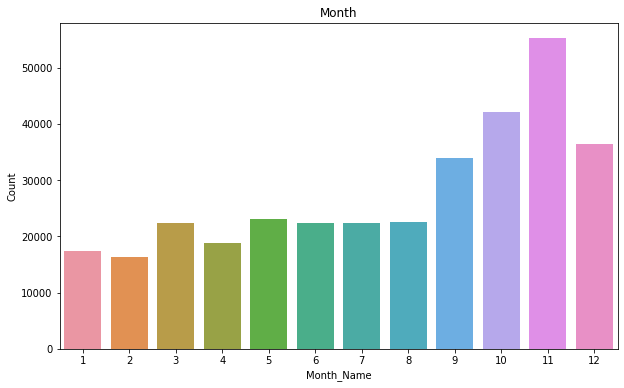

In [61]:
# Plot the result
plt.figure(figsize=(10,6))
plt.title('Month')
sns.barplot(x='Month_Name', y='Count', data=month_df)

Most number of purchasing is done in the month of november.

In [62]:
# Analyze the number of items purchased throughout the day
hour_df=customer_df['InvoiceDate_hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'InvoiceDate_hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,61044
1,13,54497
2,14,46050
3,11,40956
4,15,38303
5,10,30233
6,16,20500
7,9,17550
8,17,11104
9,8,6964


<AxesSubplot:title={'center':'Hour'}, xlabel='Hour_Name', ylabel='Count'>

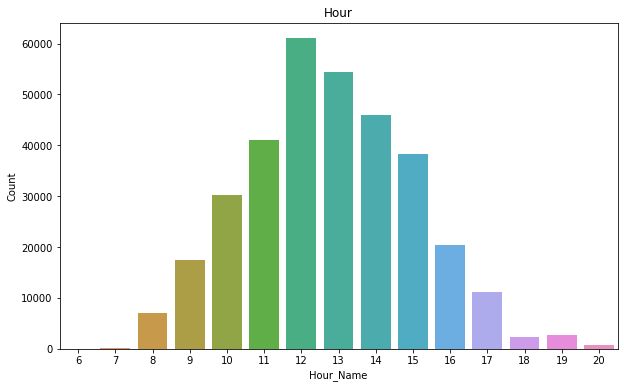

In [63]:
# Plot the result
plt.figure(figsize=(10,6))
plt.title('Hour')
sns.barplot(x='Hour_Name', y='Count', data=hour_df)

Most of the purchasing was done after 12pm.

<AxesSubplot:title={'center':'Time_Type'}, xlabel='Time_type', ylabel='count'>

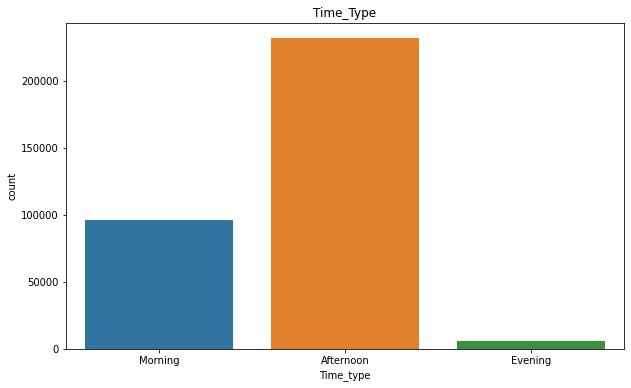

In [64]:
# Lets distribute the day in Morining Afternoon and Evening
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'
customer_df['Time_type']=customer_df['InvoiceDate_hour'].apply(time_type)
# Plot the graph
plt.figure(figsize=(10,6))
plt.title('Time_Type')
sns.countplot(x='Time_type', data = customer_df)

 From above plot we can conclude that most number of purchasing is done in afternoon and least number of purchasing is done in evening.


Model Building

Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation.
 Examples of these would be features such as amount spend, activeness of the customer, their last visit, etc.

Using RFM model (Recency, Frequency,Monetary value)
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures.

The RFM model is based on three quantitative factors:

Recency: How recently did a customer made a purchase?

Frequency: How often a customer makes a purchase?

Monetary Value: How much money a customer spends on a purchase?

Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.

The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.
Calculating RFM scores

The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.



In [65]:
# Set Latest date 2011-12-10 as last invoice date was 2011-12-09
#This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

In [66]:
# Create RFM modelling for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 
                                                'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,166,3314.73
1,12348.0,248,6,90.20
2,12349.0,18,58,999.15
3,12350.0,310,16,294.40
4,12352.0,36,66,1130.94


In [67]:
# Descriptive Staistics
rfm_df.Recency.describe()

count    4192.000000
mean       91.977576
std        99.896494
min         0.000000
25%        17.000000
50%        50.000000
75%       143.000000
max       373.000000
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Recency', ylabel='Density'>

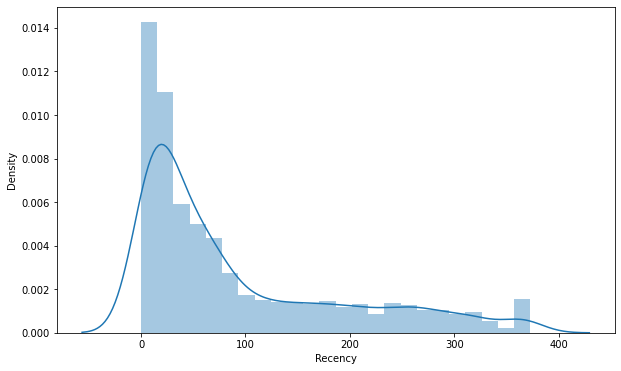

In [68]:
# Recency Distribution Plot
x = rfm_df['Recency']
plt.figure(figsize=(10,6))
sns.distplot(x)

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

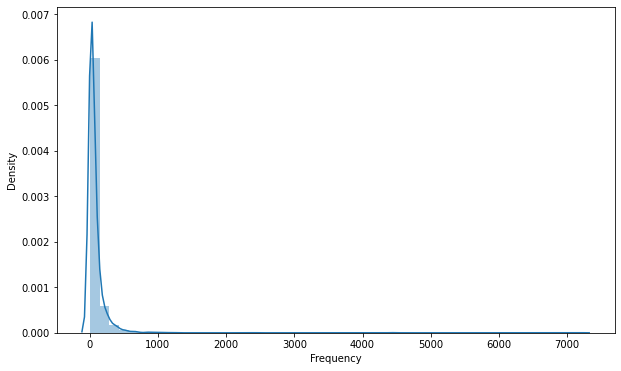

In [69]:
# Desriptive Statistics (Frequency)
x = rfm_df['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(x)

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

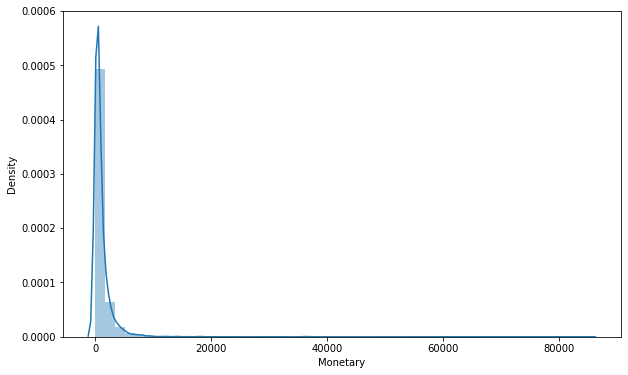

In [70]:
# Descriptive Staistics (Monetray)
x = rfm_df['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(x)

In [71]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

<AxesSubplot:xlabel='Recency', ylabel='Density'>

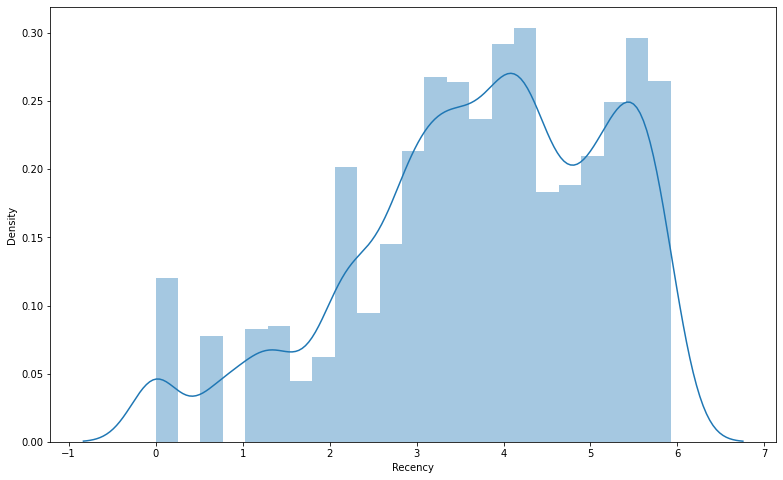

In [72]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

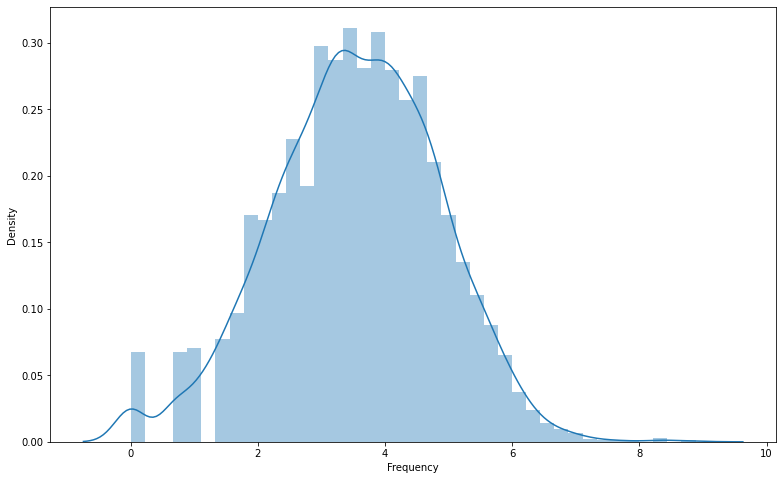

In [73]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

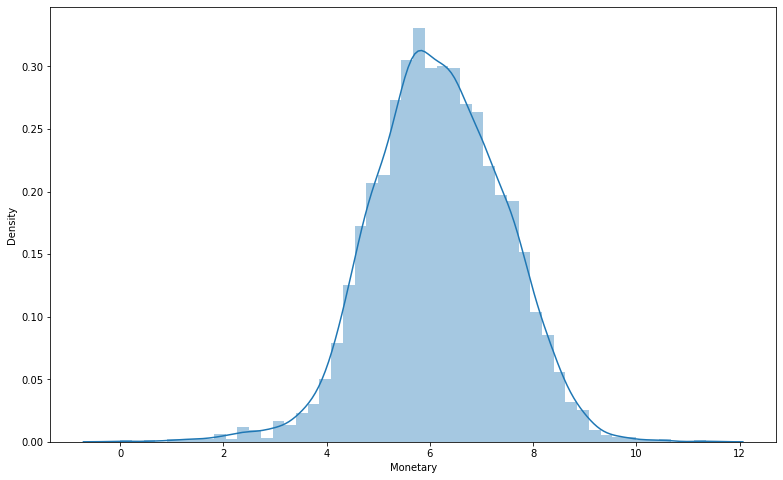

In [74]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

Split into four segments using Quantiles

In [75]:
# Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles 

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 14.0, 0.5: 36.0, 0.75: 87.0},
 'Monetary': {0.25: 206.12000000000003,
  0.5: 465.77000000000004,
  0.75: 1126.985}}

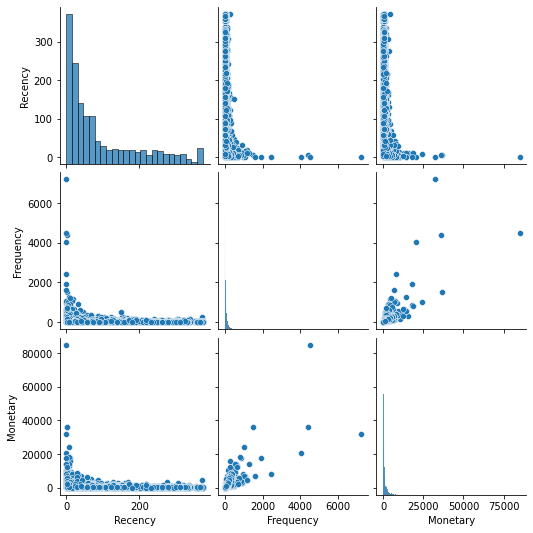

In [76]:
# Graphical representation of the relation between recency, frequency and monetary
sns.pairplot(rfm_df)

In [77]:
# Functions to create R,F and M segments
def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [78]:
# Calculate and addd R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,166,3314.73,1,1,1
12348.0,248,6,90.20,4,4,4
12349.0,18,58,999.15,2,2,2
12350.0,310,16,294.40,4,3,3
12352.0,36,66,1130.94,2,2,1


In [79]:
# Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

In [80]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12347.0,2,166,3314.73,1,1,1,111,3
12348.0,248,6,90.20,4,4,4,444,12
12349.0,18,58,999.15,2,2,2,222,6
12350.0,310,16,294.40,4,3,3,433,10
12352.0,36,66,1130.94,2,2,1,221,5


K-Means Clsutering Implementation

In [81]:
# Importing libraries necessary for clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [82]:
# Creating an instance of the model
kmeans = KMeans()

K-Means Clsutering Implementation

In [83]:
# Creating variable
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# Applying Elbow Method on Recency and Monetary

In [84]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
sum_of_sq_dist = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

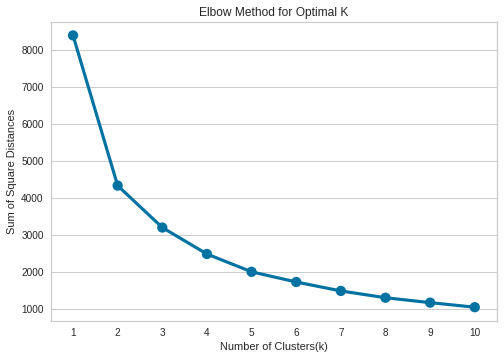

In [85]:
# Plot the graph for the sum of square distance values and number of clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y= list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [86]:
print(sum_of_sq_dist)

{1: 8383.999999999996, 2: 4326.545394169041, 3: 3193.691953795803, 4: 2478.903936255316, 5: 1997.4382094013627, 6: 1722.923989795111, 7: 1480.901911727541, 8: 1297.9126161524528, 9: 1164.901717287577, 10: 1041.651613423418}


# Applying Silhouette score method on Recency and Monetary

In [87]:

features_rec_mon = ['Recency_log','Monetary_log']
X_features_rec_mon = rfm_df[features_rec_mon].values
# Fit the model
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_
# Check the silhouette score on clusters
  score = silhouette_score(X,preds)
  print(' For n_clusters = {}, silhouette sore is{}'.format (n_clusters, score))

 For n_clusters = 2, silhouette sore is0.4164209521308602
 For n_clusters = 3, silhouette sore is0.3429281987574949
 For n_clusters = 4, silhouette sore is0.3585225716441847
 For n_clusters = 5, silhouette sore is0.341312606565622
 For n_clusters = 6, silhouette sore is0.33173648332437167
 For n_clusters = 7, silhouette sore is0.34443608506474505
 For n_clusters = 8, silhouette sore is0.35251457068603154
 For n_clusters = 9, silhouette sore is0.34695371194876806
 For n_clusters = 10, silhouette sore is0.3496723044822875


In [88]:
# Taking number of cluster as 2
kmeans =  KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

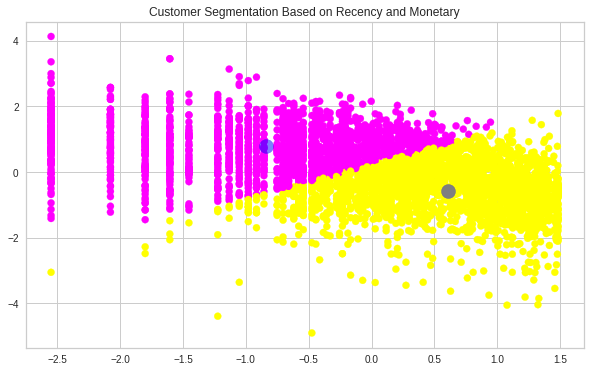

In [89]:
# Plot customer segmentation by taking k=2
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

We see that customers are well separated when we cluster them on the basis of Recency and Monetary

#Frequency and Monetary

# Applying elbow method on Frequency and Monetary

In [90]:

sum_of_sq_dist = {}
for k in range (1,11):
  km = KMeans(n_clusters= k, init = 'k-means++', max_iter= 1000)
  km = km.fit(X)
  sum_of_sq_dist[k] = km.inertia_

In [91]:
print(sum_of_sq_dist)

{1: 8383.999999999996, 2: 4326.545394169041, 3: 3193.696168305875, 4: 2478.963406894318, 5: 1997.5559558561636, 6: 1722.8483428142522, 7: 1480.9156075343783, 8: 1297.813809894877, 9: 1169.9297545480372, 10: 1040.105481507845}


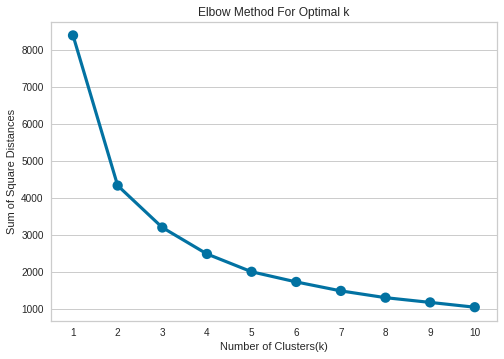

In [92]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Applying silhouette score method on Frequency and Monetary

In [93]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.49605294058759625
For n_clusters = 3, silhouette score is 0.44235933431110935
For n_clusters = 4, silhouette score is 0.40487895888940323
For n_clusters = 5, silhouette score is 0.37657084249570083
For n_clusters = 6, silhouette score is 0.36519891157911116
For n_clusters = 7, silhouette score is 0.3808584898194746
For n_clusters = 8, silhouette score is 0.3674703776454957
For n_clusters = 9, silhouette score is 0.38490317534806945
For n_clusters = 10, silhouette score is 0.37568088149698414


In [94]:
# Taking the number of clusters as 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

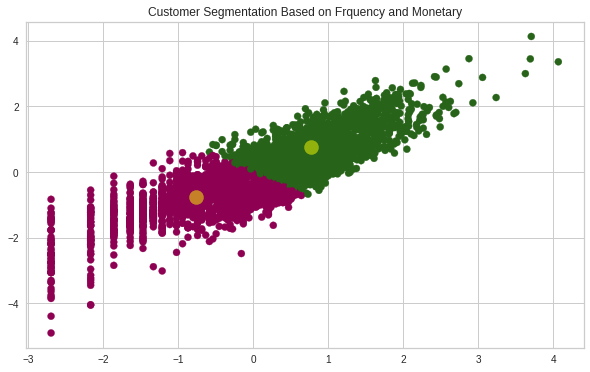

In [95]:
# Plot customer segmentation based on Fequency and Monetary
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Frquency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

Customers are well separated when we cluster them on basis of Frequency and Monetary.

#Applying Elbow Method on Recency, Frequency and Monetary

In [96]:
sum_of_sq_dist = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

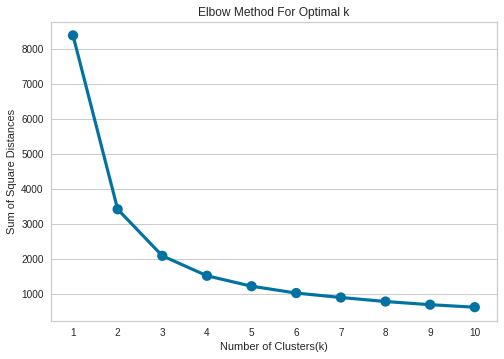

In [97]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()



# Apply silhouette on RFM

In [98]:
feature_vector = ['Recency_log', 'Frequency_log', 'Monetary_log']
X_features = rfm_df[feature_vector].values
scaler = preprocessing.StandardScaler()
X= scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.4020637644688081


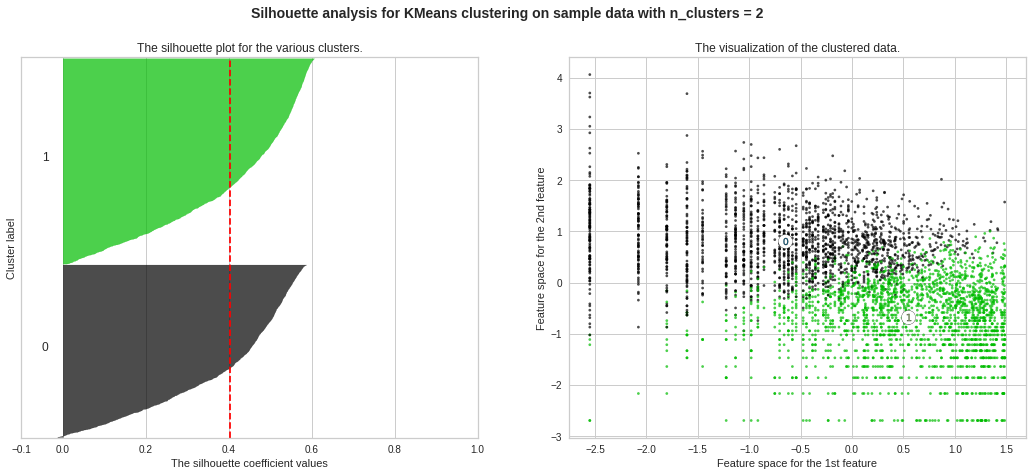

For n_clusters = 3 The average silhouette_score is : 0.3135020842448222


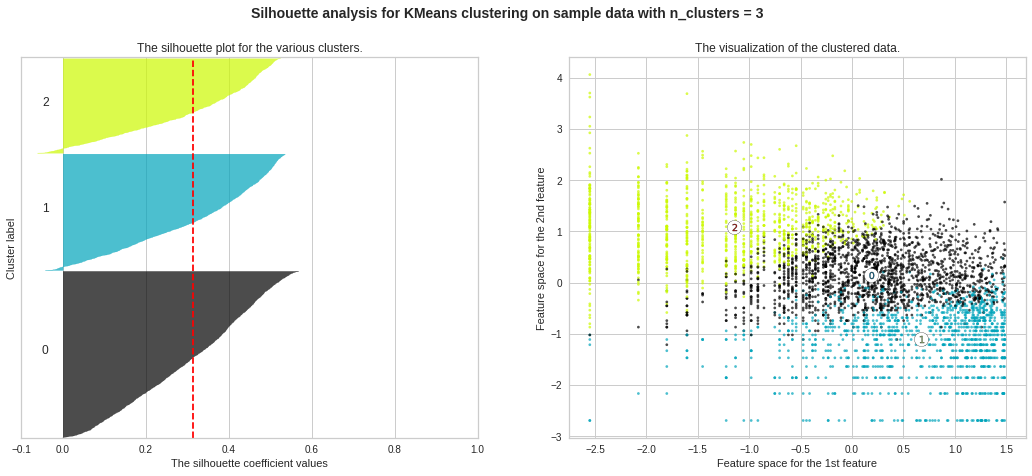

For n_clusters = 4 The average silhouette_score is : 0.30906631117961697


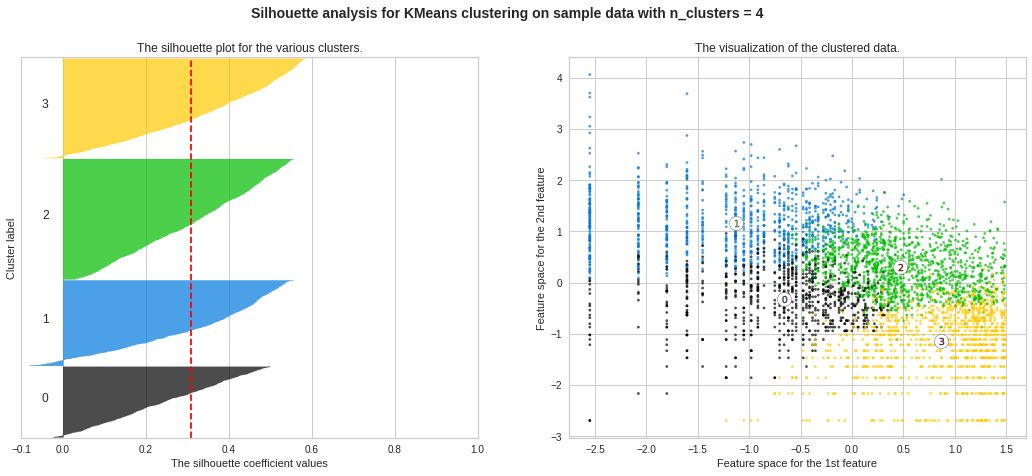

For n_clusters = 5 The average silhouette_score is : 0.30327238584312766


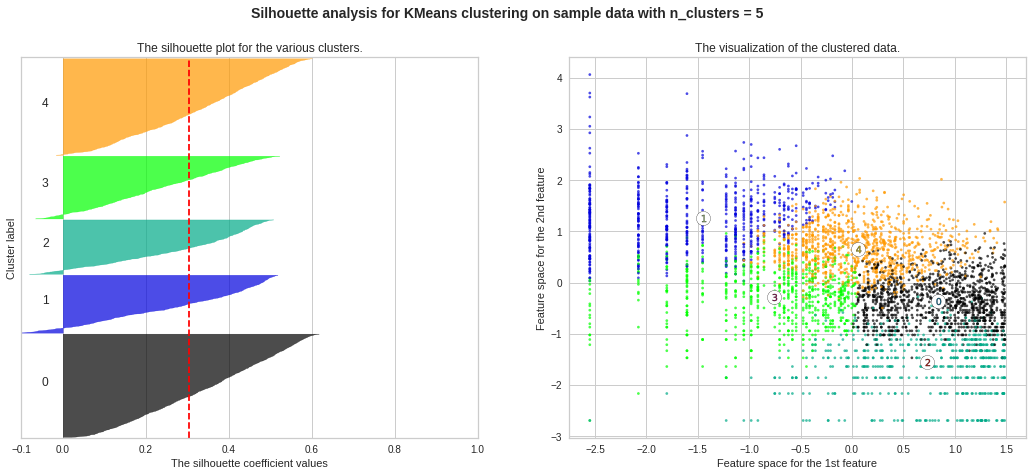

For n_clusters = 6 The average silhouette_score is : 0.2797174092379777


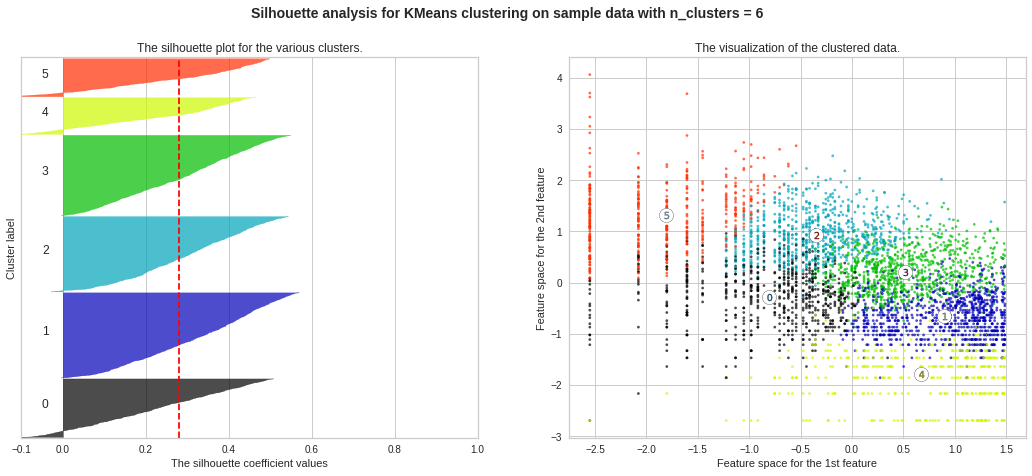

For n_clusters = 7 The average silhouette_score is : 0.2840778631493836


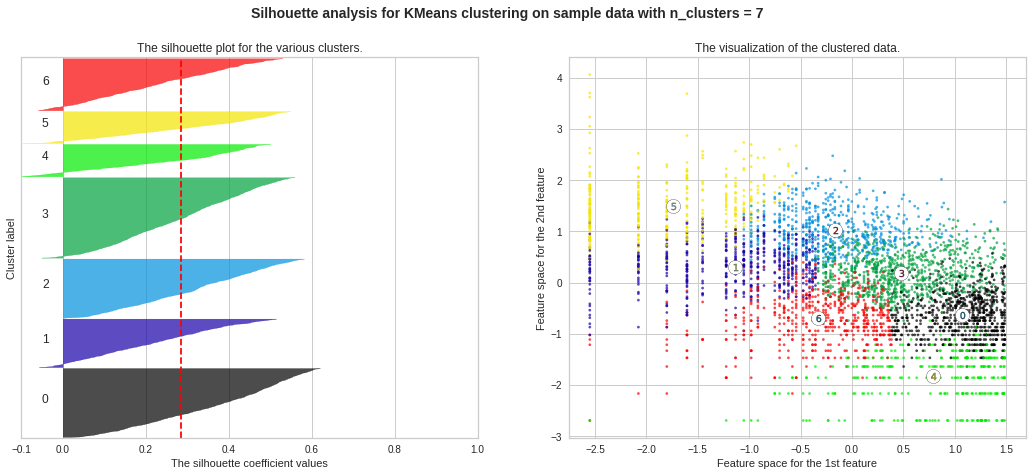

For n_clusters = 8 The average silhouette_score is : 0.273847261249774


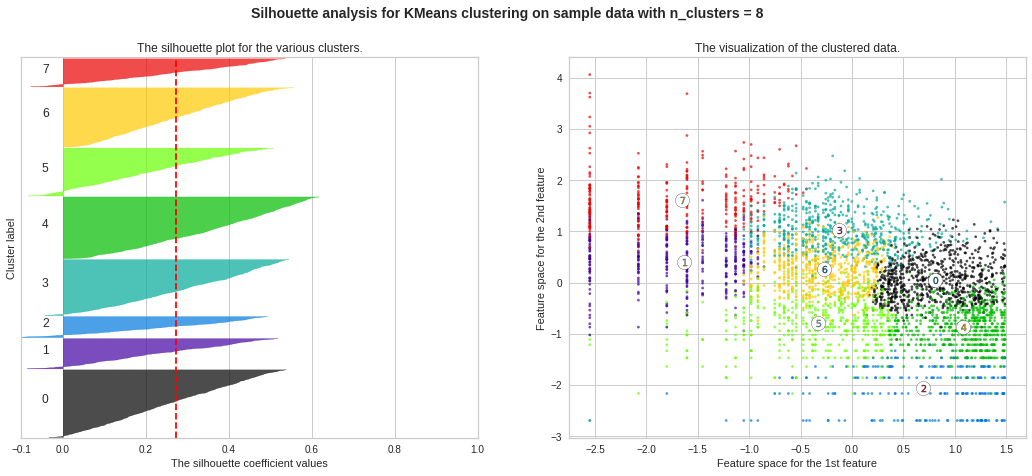

For n_clusters = 9 The average silhouette_score is : 0.27352279690863074


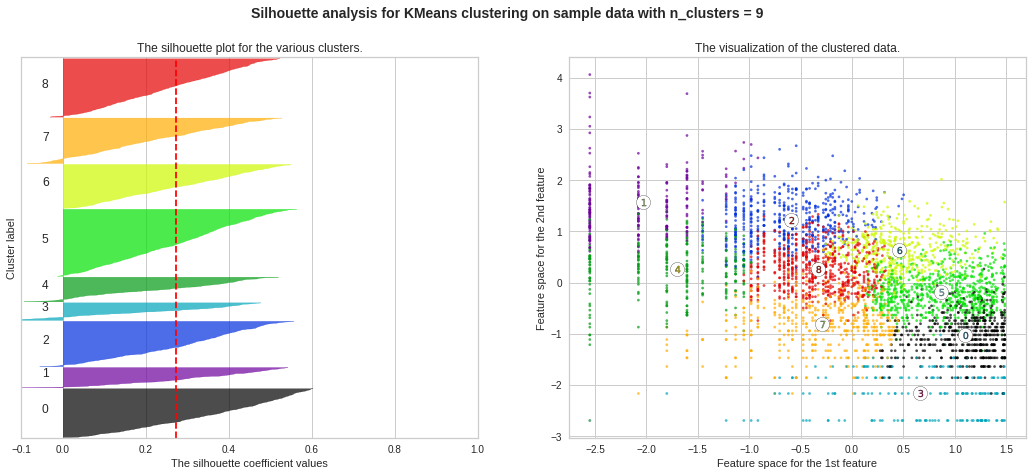

For n_clusters = 10 The average silhouette_score is : 0.2780777044198015


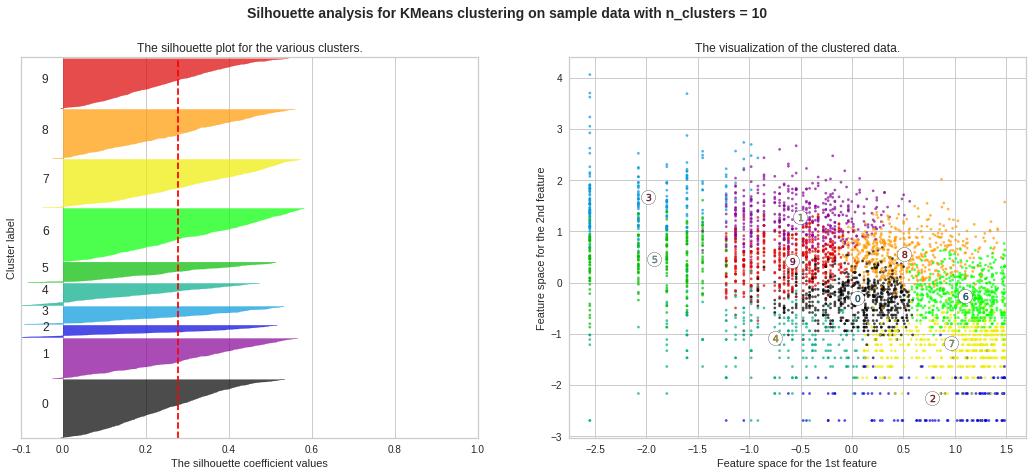

In [99]:
# Plot a silhouette of RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()


#Dendogram

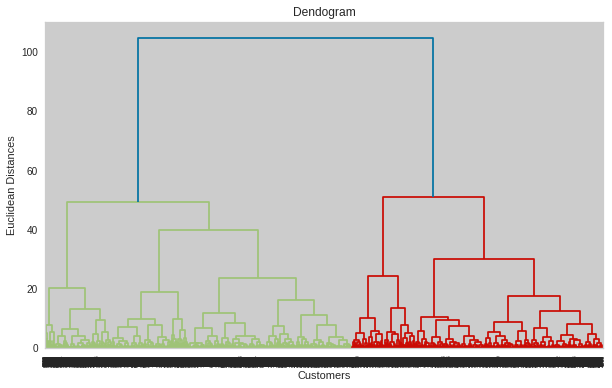

In [100]:
# plot the optimal number of cluster using Dendogram
# Find the largest vertical ditance we can make without crossing any other horizontal line
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(sch.linkage(X,method= 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the liine drawn using the threshold = 90

Number of cluster is 2

In [101]:
# Create a table and specify the column while initializing the table
summary_table = PrettyTable(['Sr. No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])
# Add Rows
summary_table.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
summary_table.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
summary_table.add_row(['3',"K-Means with silhouette_score ", "FM", "2"]) 
summary_table.add_row(['4',"K-Means with Elbow methos  ", "FM", "2"])
summary_table.add_row(['5',"K-Means with silhouette_score ", "RFM", "2"]) 
summary_table.add_row(['6',"K-Means with Elbow methos  ", "RFM", "2"])

print(summary_table)

+---------+--------------------------------+------+---------------------------+
| Sr. No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+---------+--------------------------------+------+---------------------------+
|    1    | K-Means with silhouette_score  |  RM  |             2             |
|    2    |  K-Means with Elbow methos     |  RM  |             2             |
|    3    | K-Means with silhouette_score  |  FM  |             2             |
|    4    |  K-Means with Elbow methos     |  FM  |             2             |
|    5    | K-Means with silhouette_score  | RFM  |             2             |
|    6    |  K-Means with Elbow methos     | RFM  |             2             |
+---------+--------------------------------+------+---------------------------+


#Conclusion

In this project  i did  various steps to perform customer segmentation. Started with data wrangling in which  tried to handle null values, duplicates and performed feature modifications.
 Next, some exploratory data analysis and tried to draw observations from the features  had in the dataset.

Next,  formulated some quantitative factors such as recency, frequency and monetary known as rfm model for each of the customers.
Implemented KMeans clustering algorithm on these features.  Also performed silhouette and elbow method analysis to determine the optimal no. of clusters which was 2. 
Observation is customers having high recency and low frequency and monetary values were part of one cluster and customers having low recency and high frequency, monetary values were part of another cluster.



 